# Moire Pattern

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Function to generate graphene lattice
def generate_graphene(num_cells, angle=0):
    a = 1.42  # Nearest-neighbor bond length
    a0 = np.sqrt(3) * a  # Lattice constant
    a1 = np.array([a0, 0])
    a2 = np.array([a0/2, np.sqrt(3)*a0/2])
    basis = np.array([[0, 0], [a/np.sqrt(3), 0]])
    
    atoms = []
    for i in range(-num_cells, num_cells):
        for j in range(-num_cells, num_cells):
            R = i * a1 + j * a2
            for b in basis:
                atoms.append(R + b)
    
    atoms = np.array(atoms)
    # Apply rotation for the second layer
    theta = np.radians(angle)
    R_matrix = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])
    rotated_atoms = np.dot(atoms, R_matrix.T)
    
    return atoms, rotated_atoms


In [10]:
# Generate and plot twisted bilayer graphene
num_cells = 20
angle = 10  # Twist angle in degrees
atoms1, atoms2 = generate_graphene(num_cells), generate_graphene(num_cells, angle)

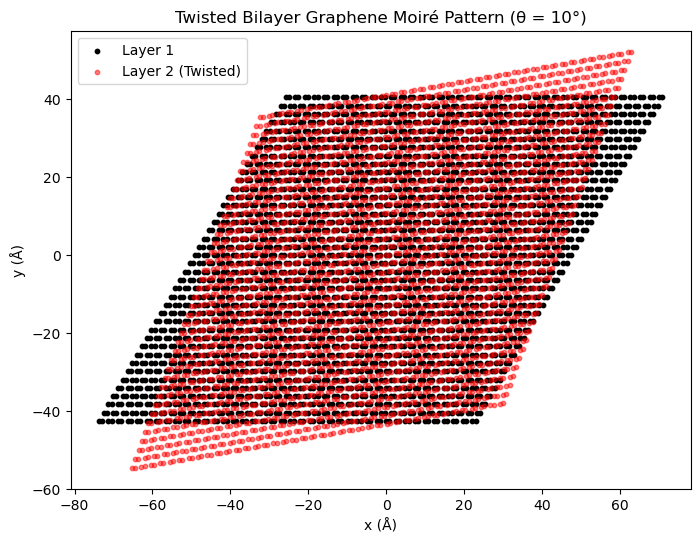

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(atoms1[0][:, 0], atoms1[0][:, 1], c='black', s=10, label="Layer 1")
plt.scatter(atoms2[1][:, 0], atoms2[1][:, 1], c='red', s=10, alpha=0.5, label="Layer 2 (Twisted)")
plt.gca().set_aspect('equal')
plt.legend()
plt.xlabel("x (Å)")
plt.ylabel("y (Å)")
plt.title(f"Twisted Bilayer Graphene Moiré Pattern (θ = {angle}°)")
plt.show()